## **Effects of Covid on Anxiety Levels Based on Loneliness, Gender, Marital Status, feeling Safe, Effect on Work and Disability**

e.g. The outbreak of Covid 19 and the subsequent lockdown has had a big effect on peoples mental health, particularly their anxiety levels.  Looking at a survey of people in the UK during the first period of lockdown, this notebook will look at the six categories above to build a profile of someone who would most likely see increased anxiety levels due to Covid 19 and lockdown. 

Plan:
- Investigate Data
- Clean data in Excel 
- combine data into a single dataframe in Jupyter Notebooks
- Show trends in each group with Visualization
- Run a regression model to look at a the effect of groups on anxiety
- Use this info to build a profile of someone with the highest anxiety levels during the surveyed period

Presentation:
e.g. Use visualizations with Matplotlib/Seaborn to show trends with anxiety over subgroup. Show heatmap/Linear Regression to highlight groups with biggest connection to anxiety.

# **Intro**

First I have downloaded the original dataset which can be located here:
https://github.com/midbrain1/programming_for_data/blob/main/Data%20Sets/coronavirusandanxietyestimates3apr10may2020.xlsx?raw=true

From there I have edited the document in Excel to pull out the mean averages from each group to 



In [87]:
import pandas as pd
import numpy as np


#dataset being worked with
url = 'https://github.com/midbrain1/programming_for_data/blob/main/Data%20Sets/Covid_Anx.xlsx?raw=true'

#download each sheet from excel doc
lonely_df = pd.read_excel(url, sheet_name='loneliness')
sex_df = pd.read_excel(url, sheet_name='sex')
marital_status_df = pd.read_excel(url, sheet_name='marital status')
feeling_safe_df = pd.read_excel(url, sheet_name='feeling safe')
work_affected_df = pd.read_excel(url, sheet_name='work affected')
disability_df = pd.read_excel(url, sheet_name='disability')

#combine into a data frame
combine = [lonely_df,sex_df.iloc[: , 1:],marital_status_df.iloc[: , 1:],feeling_safe_df.iloc[: , 1:],work_affected_df.iloc[: , 1:],disability_df.iloc[: , 1:]]
Covid_Anx_Df = pd.concat(combine, axis=1, join="inner")
#Covid_Anx_Df[["Never Lonely", "Sometimes Lonely", "Always Lonely", "Male", "Female", "Single", "Married or co-habiting", "Widowed", "Very Safe", "Safe", "Neither safe nor unsafe", "Unsafe / Very unsafe", "Not, My work is being affected", "My work is being affected", "Non-disabled", "Disabled", "Refusal / Don't know"]] = Covid_Anx_Df[["Never Lonely", "Sometimes Lonely", "Always Lonely", "Male", "Female", "Single", "Married or co-habiting", "Widowed", "Very Safe", "Safe", "Neither safe nor unsafe", "Unsafe / Very unsafe", "Not, My work is being affected", "My work is being affected", "Non-disabled", "Disabled", "Refusal / Don't know"]].astype(int)

Covid_Anx_Df


,Time Period of Lockdown,Never Lonely,Barely Lonely,Occasionally Lonely,Sometimes Lonely,Always Lonely,Male,Female,Single,Married or co-habiting,...,Widowed,Very Safe,Safe,Neither safe nor unsafe,Unsafe / Very unsafe,"Not, My work is being affected",My work is being affected,Non-disabled,Disabled,Refusal / Don't know
0,20th Mar – 29th Mar,4.25,4.62,5.72,5.76,7.45,4.57,5.77,4.92,5.34,...,4.96,NaN,NaN,NaN,NaN,NaN,NaN,4.964249,5.723510,5.794493
1,27th Mar – 5th Apr,3.95,4.64,5.40,5.63,6.64,4.39,5.57,4.86,5.12,...,4.63,NaN,NaN,NaN,NaN,4.639394,5.524037,4.744552,5.685009,5.607458
2,3rd Apr – 12th Apr,3.87,4.49,5.11,5.42,7.64,4.37,5.42,4.88,4.92,...,4.31,4.426378,4.918897,5.931502,6.766226,4.802602,5.028951,4.622171,5.481891,6.088355
3,9th Apr – 19th Apr,3.36,3.96,4.33,4.76,6.87,3.93,4.44,3.98,4.38,...,4.30,3.469462,4.544258,4.703343,5.511776,3.966348,4.549271,3.970078,4.843096,4.392600
4,17th Apr – 26th Apr,2.74,3.98,4.43,5.75,5.47,3.89,4.54,4.24,4.29,...,3.43,3.537505,4.547078,5.004599,5.067140,3.728300,4.988865,3.987709,4.999135,4.371096
5,24th Apr – 3rd May,3.09,3.67,4.27,5.22,5.63,3.55,4.55,4.06,4.26,...,3.67,3.515819,4.197686,4.967427,5.616580,3.790978,4.537422,3.721159,4.941741,4.467173
6,30th Apr - 10th May,2.81,3.54,4.54,5.04,6.73,3.70,4.37,3.82,4.15,...,3.81,3.378660,4.267407,5.569236,5.974537,3.674080,4.830373,3.760439,4.773551,4.892126


# **Data Cleaning and Wrangling**
In this section I will be inspecting the data to see if I have numerical values to work with and how many non-null values I have

In [88]:
Covid_Anx_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Time Period of Lockdown         7 non-null      object 
 1   Never Lonely                    7 non-null      float64
 2   Barely Lonely                   7 non-null      float64
 3   Occasionally Lonely             7 non-null      float64
 4   Sometimes Lonely                7 non-null      float64
 5   Always Lonely                   7 non-null      float64
 6   Male                            7 non-null      float64
 7   Female                          7 non-null      float64
 8   Single                          7 non-null      float64
 9   Married or co-habiting          7 non-null      float64
 10  Separated / Divorced            7 non-null      float64
 11  Widowed                         7 non-null      float64
 12  Very Safe                       5 non-nu

# **Visualization**

With the data in a form that can start to be analyzed, we then can start to look at which group has the highst over all anxiety levels over the whole period.

In [89]:
import matplotlib.pyplot as plt

In [90]:
#Shows max values of each category
Max_Anx = Covid_Anx_Df.drop(['Time Period of Lockdown'], axis=1).max()
Max_Anx   

Never Lonely                      4.250000
Barely Lonely                     4.640000
Occasionally Lonely               5.720000
Sometimes Lonely                  5.760000
Always Lonely                     7.640000
Male                              4.570000
Female                            5.770000
Single                            4.920000
Married or co-habiting            5.340000
Separated / Divorced              5.470000
Widowed                           4.960000
Very Safe                         4.426378
Safe                              4.918897
Neither safe nor unsafe           5.931502
Unsafe / Very unsafe              6.766226
Not, My work is being affected    4.802602
My work is being affected         5.524037
Non-disabled                      4.964249
Disabled                          5.723510
Refusal / Don't know              6.088355
dtype: float64

We can then plot this in a bar graph to better illustrate this point.

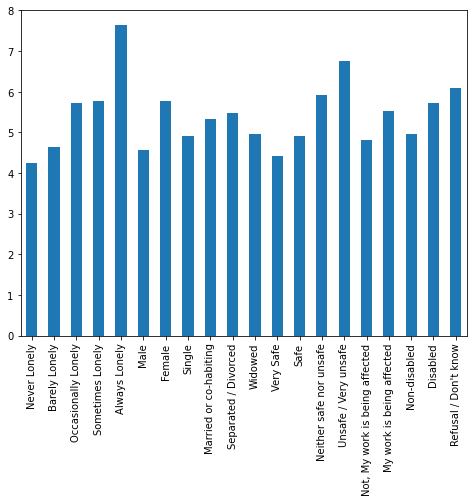

In [91]:
bar_plot = Max_Anx.plot.bar()
bar_plot

Now we will look at how each category each changed their anxiety levels over the course of the lockdown.

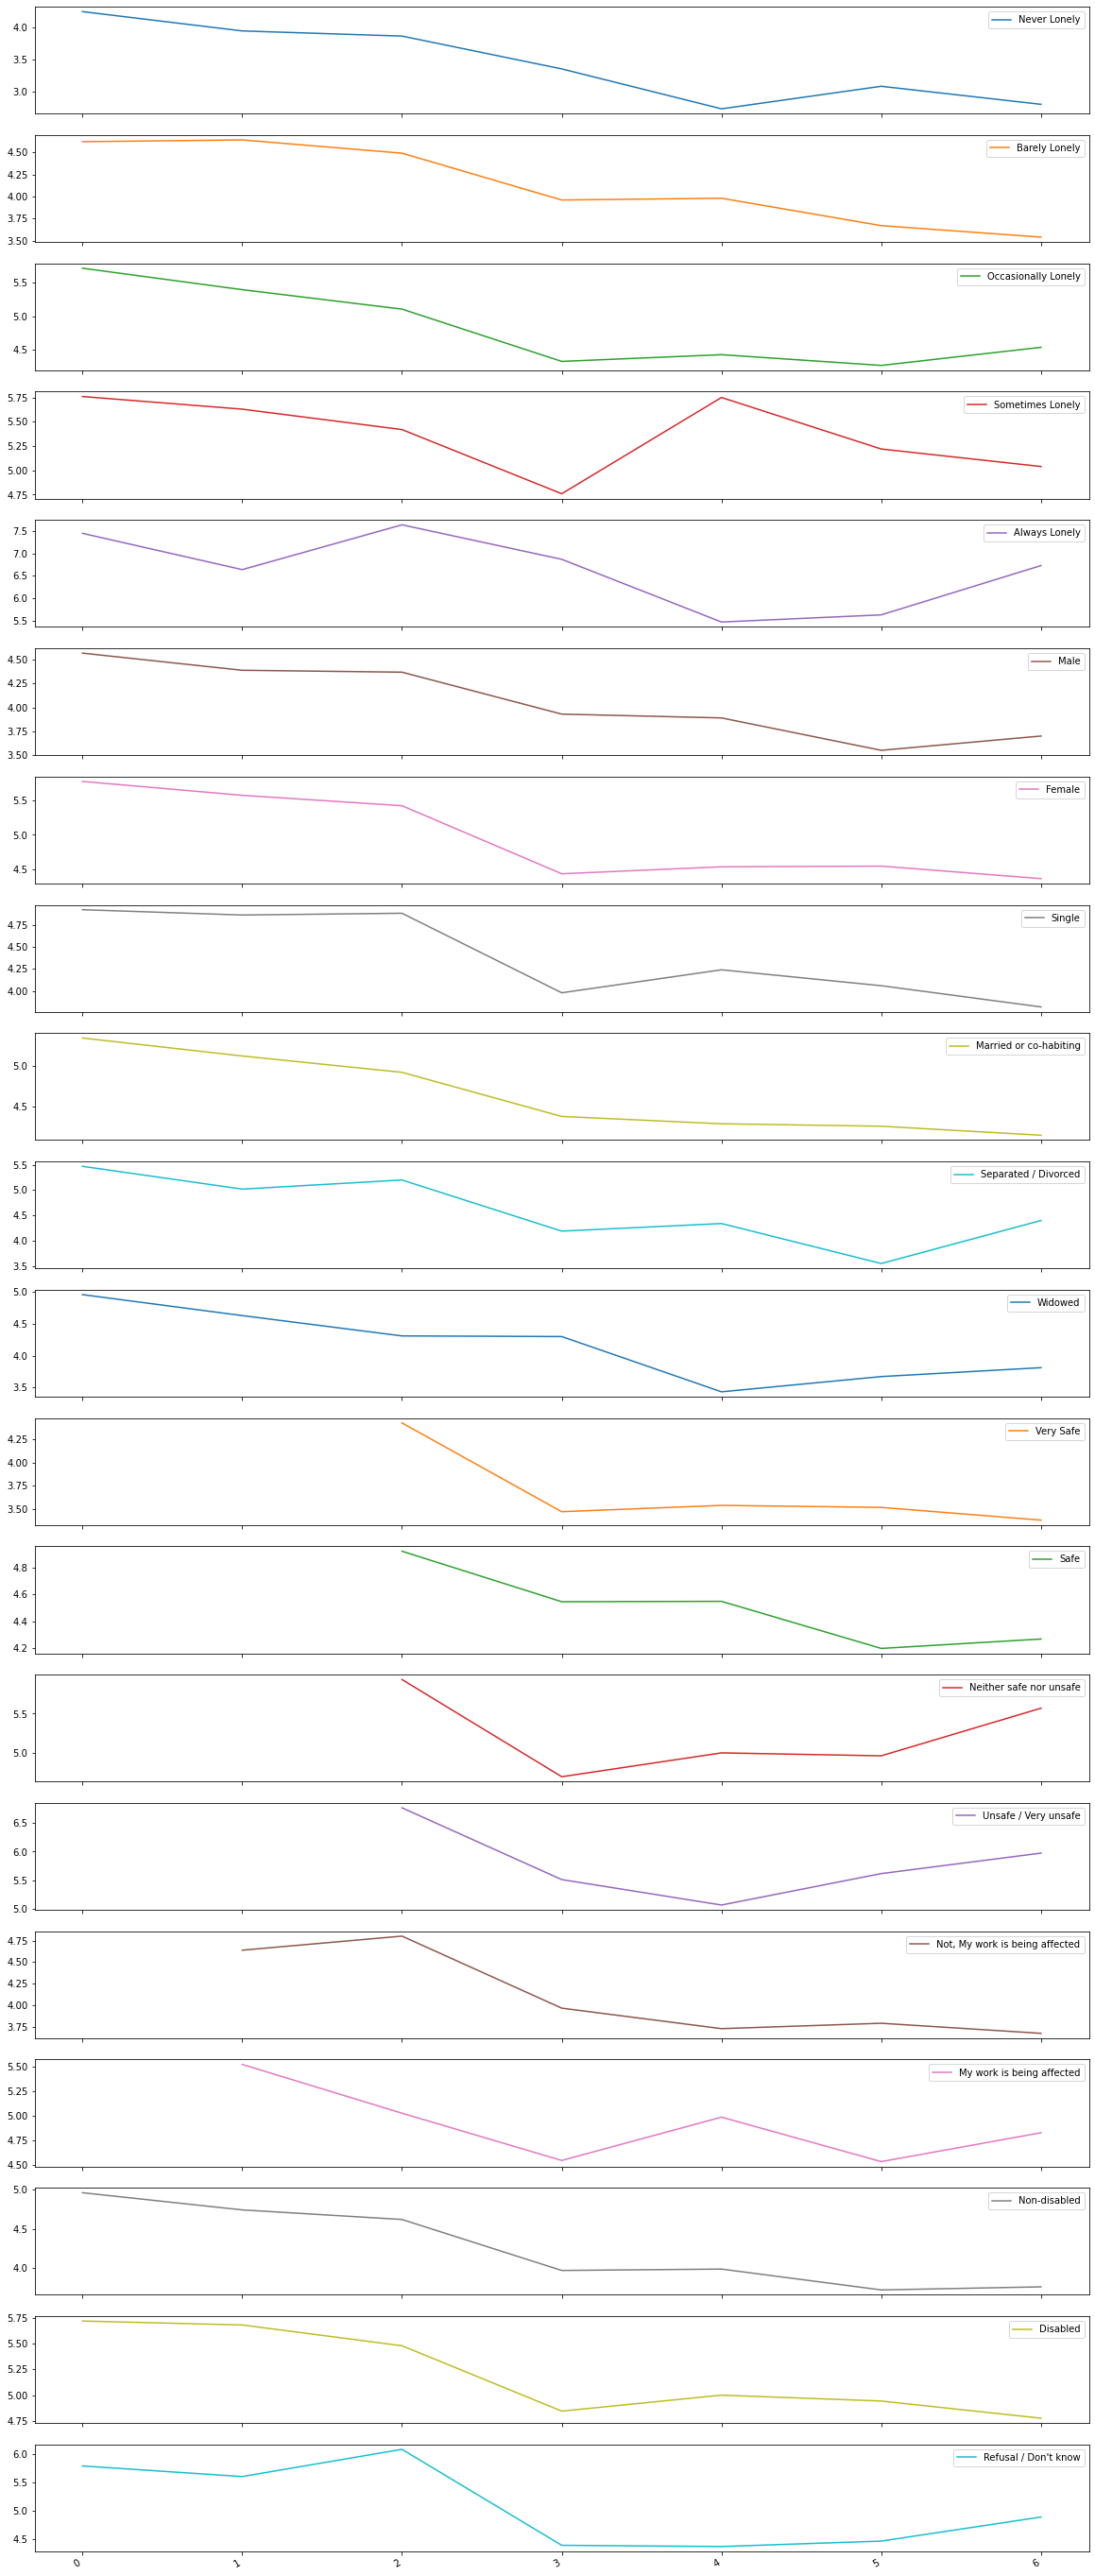

In [92]:
#Takes the different columns and gives them their own seperate line graph
sub_plots = Covid_Anx_Df.plot(subplots = True, figsize = (20,55))

What is interesting about this data above is who sees a second spike in anxiety as the first lockdown continues.  This is especially true of the 'Sometimes Lonely' group, as this could suggest that the lockdown had the effect of pushing people with the potential of being anxious into an even more anxious position, although much more data is needed to add weight to this assumption.

The next thing I will do is a correlation matrix to see how each category correlates with each other and average anxiety levels.

In [96]:
plt.rcParams["figure.figsize"] = [8,6]
corr = Covid_Anx_Df.corr()
corr

,Never Lonely,Barely Lonely,Occasionally Lonely,Sometimes Lonely,Always Lonely,Male,Female,Single,Married or co-habiting,Separated / Divorced,Widowed,Very Safe,Safe,Neither safe nor unsafe,Unsafe / Very unsafe,"Not, My work is being affected",My work is being affected,Non-disabled,Disabled,Refusal / Don't know
Never Lonely,1.000000,0.902724,0.889028,0.378133,0.740618,0.904879,0.933563,0.877423,0.961654,0.792742,0.945051,0.841713,0.742216,0.419308,0.759508,0.955803,0.544224,0.930267,0.905726,0.833188
Barely Lonely,0.902724,1.000000,0.888814,0.627564,0.578041,0.969035,0.944650,0.964763,0.956900,0.860206,0.805470,0.896861,0.975761,0.411098,0.510199,0.925466,0.776541,0.974174,0.955272,0.803123
Occasionally Lonely,0.889028,0.888814,1.000000,0.637784,0.660207,0.932015,0.964619,0.901882,0.964597,0.923672,0.853403,0.914343,0.796209,0.897960,0.865089,0.888114,0.897653,0.964516,0.950540,0.887542
Sometimes Lonely,0.378133,0.627564,0.637784,1.000000,-0.051465,0.576346,0.658268,0.719220,0.600179,0.559670,0.214149,0.350641,0.305423,0.268013,-0.097295,0.329909,0.729824,0.633294,0.711549,0.462194
Always Lonely,0.740618,0.578041,0.660207,-0.051465,1.000000,0.714902,0.614724,0.541603,0.646962,0.772055,0.790332,0.634612,0.631438,0.628416,0.842745,0.686081,0.209027,0.665242,0.532567,0.790376
Male,0.904879,0.969035,0.932015,0.576346,0.714902,1.000000,0.935417,0.928325,0.958231,0.949832,0.857565,0.869415,0.990474,0.548610,0.611083,0.926209,0.777873,0.987081,0.925506,0.850203
Female,0.933563,0.944650,0.964619,0.658268,0.614724,0.935417,1.000000,0.973997,0.986442,0.868905,0.826469,0.998546,0.825273,0.705185,0.783911,0.955103,0.801311,0.978223,0.993223,0.898579
Single,0.877423,0.964763,0.901882,0.719220,0.541603,0.928325,0.973997,1.000000,0.947387,0.848119,0.722007,0.969815,0.869380,0.596803,0.621769,0.934313,0.777163,0.959735,0.979952,0.870691
Married or co-habiting,0.961654,0.956900,0.964597,0.600179,0.646962,0.958231,0.986442,0.947387,1.000000,0.873512,0.893591,0.975272,0.906523,0.581523,0.743059,0.961165,0.784879,0.988727,0.977753,0.853915
Separated / Divorced,0.792742,0.860206,0.923672,0.559670,0.772055,0.949832,0.868905,0.848119,0.873512,1.000000,0.775700,0.774712,0.860595,0.770480,0.686626,0.821659,0.789331,0.925269,0.844491,0.889002


Again the correlation above should be taken with some skeptism because of the limited data available, but it appears to indicate that being female and Disabled would make someone score the highest as far as anxiety levels.  

Putting these two categories in a linear reggression model will show if these two categories are a good predictor of a positive correlation with anxiety.


In [104]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#The female category will be put into X and the disabled category into y
X = Covid_Anx_Df.filter(['Female'], axis=1)
y = Covid_Anx_Df.filter(['Disabled'], axis=1)
#The variables will now be put in their training and tests set,with an 80/20 split.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40, random_state=1)


In [109]:
Regression = LinearRegression()
Regression.fit(X_train, y_train)
y_pred = Regression.predict(X_test)

In [110]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.057488187863636554
Mean Square Error: 0.003985169375854676
Root Mean Squared Error: 0.06312819794556689


In [111]:
Comparison_df = pd.DataFrame({'y Test':y_test.index.tolist() ,'Actual': y_test.values.tolist(),'Predicted': y_pred.tolist()})
Comparison_df

,y Test,Actual,Predicted
0,6,[4.77355105204943],[4.838097610720043]
1,2,[5.48189081452637],[5.504496172873301]
2,1,[5.68500861403999],[5.599695967466625]


As you can see, although the train and test values are very small, they point to the two values being strong predictors of anxiety levels.

# **Summary**

In summary, the data can begin to build a profile of the type of person most affected with anxiety by the First Covid Lockdown.  A disabled person who is female, judging by this small bit of data, suggests this is the most potentially affected by the lockdown.  Throw in the factor of someone who is potentially lonely and/or is working from home and they might be at risk of a second spike of anxiety after an initial spike.  On the other hand a married man who considered themselve very safe seems to have lower anxiety levels as well as have a relatively constant reduction in anxiety as the lockdown went on.

Obviously, because this is a small results of a survey where the numbers were already proccessed once, alot of this is just conjecture.  However, a lot of the results back up what would be common sense in this scenerio, so they at least warrant a deeper dive into this topic.

